<a href="https://colab.research.google.com/github/thanhnhan311201/CS114.L11.KHCL/blob/master/LeeWangHuyTrimImage_hog_16x16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Đọc ảnh, cắt ảnh và dùng HOG rút trích đặc trưng

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
from PIL import Image, ImageChops
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [14]:

def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 3.0, -100)
    bbox = diff.getbbox()
    return im.crop(bbox)
    

(47, 53)
256
(256,)


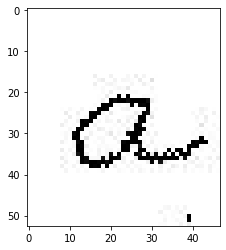

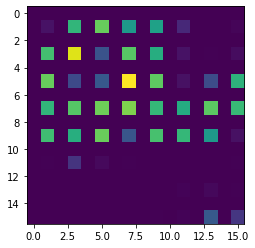

In [17]:
# Show thử một ảnh sau khi loại bỏ khoảng trắng xung quanh chữ và dùng HOG
im = Image.open("/content/drive/MyDrive/Dataset/Dataset/a/10321.jpg").convert('LA')
plt.imshow(im, cmap= 'gray')
print(im.size)
im = trim(im)
im = im.resize((16, 16))
img,im = hog(im, pixels_per_cell=(2,2), cells_per_block=(2,2), visualize=True)
plt.figure()

plt.imshow(im)
print(im.size)
print(np.asarray(im).flatten().shape)

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import numpy as np
from skimage.feature import hog

In [5]:
FJoin = os.path.join
def getLink(path):
    ans = []
    label = []
    index = 0
    list_folder = [FJoin(path, f) for f in sorted(os.listdir(path))]
    for f in list_folder:
        list_img = [FJoin(f, img_id) for img_id in sorted(os.listdir(f))]
        for img_link in list_img:
            ans.append(img_link)
            label.append(index)
        index += 1
    return ans, label


In [6]:
train_path = '/content/drive/MyDrive/Dataset/train'
vali_path = '/content/drive/MyDrive/Dataset/validation'
test_path = '/content/drive/MyDrive/Dataset/TestingData'
link_train, label_train = getLink(train_path)
link_vali, label_vali = getLink(vali_path)
link_test, label_test = getLink(test_path)
print(len(link_train))
print(len(link_vali))
print(len(link_test)) 

11865
2984
2758


In [9]:
def getFeature_Label(link, label):
    list_feature = []
    for img_link in link:
        img = Image.open(img_link).convert('LA')
        img = trim(img)
        img = img.resize((16, 16))
        img = hog(img, pixels_per_cell=(2,2), cells_per_block=(2,2), visualize=False)
        list_feature.append(np.asarray(img).ravel())
        print(np.asarray(img).ravel().shape)
    return np.array(list_feature), np.array(label)

# Lấy feature và lưu lại dưới dạng file .csv

In [8]:
X_train, Y_train = getFeature_Label(link_train, label_train)

(1764,)


In [ ]:
pd.DataFrame(X_train).to_csv('/content/drive/MyDrive/BackUpData/TrimImage/X_train_16x16_hog.csv', header= None, index=None)
pd.DataFrame(Y_train).to_csv('/content/drive/MyDrive/BackUpData/TrimImage/Y_train_16x16_hog.csv', header= None, index=None)

In [ ]:
X_test, Y_test = getFeature_Label(link_test, label_test)
X_val, Y_val = getFeature_Label(link_vali, label_vali)

In [ ]:
print(X_test.shape)
print(X_val.shape)

(2758, 1764)
(2984, 1764)


In [ ]:
pd.DataFrame(X_test).to_csv('/content/drive/MyDrive/BackUpData/AugmentData/X_test_16x16_hog.csv', header= None, index=None)
pd.DataFrame(X_val).to_csv('/content/drive/MyDrive/BackUpData/AugmentData/X_val_16x16_hog.csv', header= None, index=None)

In [ ]:
pd.DataFrame(Y_test).to_csv('/content/drive/MyDrive/BackUpData/AugmentData/Y_test_16x16_hog.csv', header= None, index=None)
pd.DataFrame(Y_val).to_csv('/content/drive/MyDrive/BackUpData/AugmentData/Y_val_16x16_hog.csv', header= None, index=None)